# 크롤링 스터디 3주차-2 (selenium)
- 인스타그램

## 주요 SNS 이용률 변화 (증가하고 있는 인스타그램 이용)
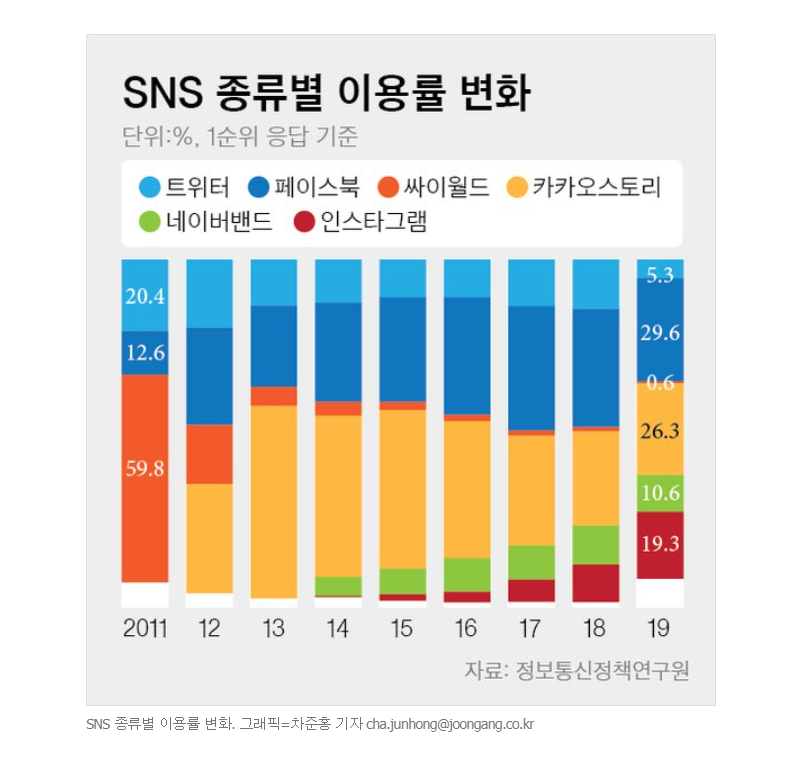

## https://www.instagram.com/

## https://www.programcreek.com/python/index/8077/selenium.webdriver.common.by.By

In [1]:
import time
import numpy as np
import pandas as pd

In [2]:
# Selenium import
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# webdriver 설정하기
driver = webdriver.Chrome(service = Service(ChromeDriverManager().install()))

## 01. 인스타그램 로그인 (나의 ID, PW)

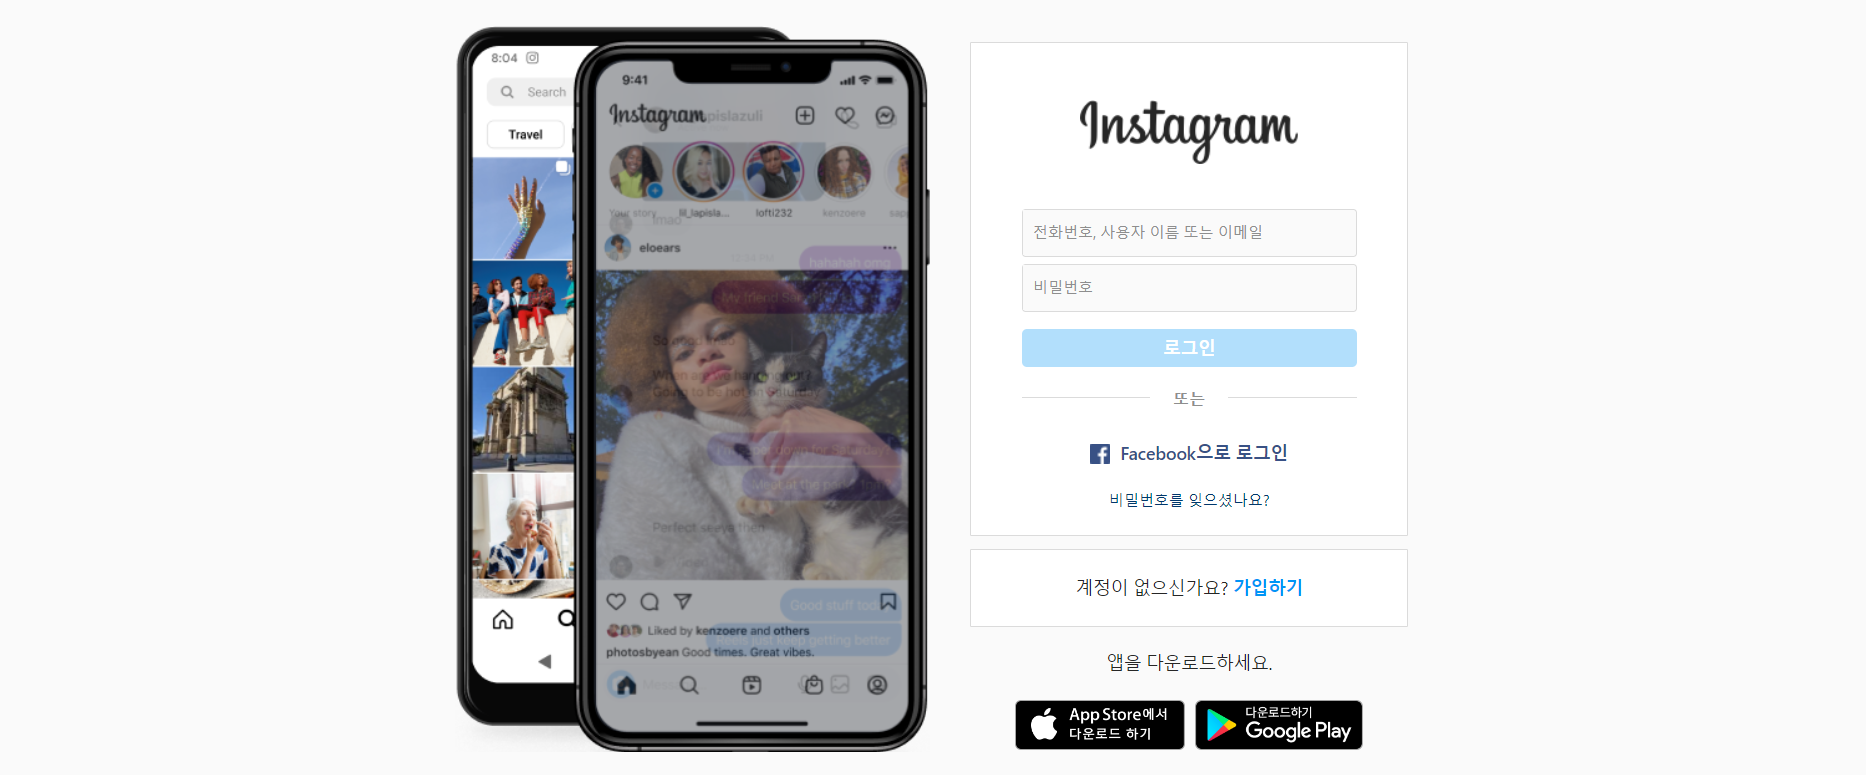

In [1]:
# 인스타그램 로그인 페이지로 접속
url = "https://www.instagram.com/" 
driver.get(url)

NameError: name 'driver' is not defined

In [ ]:
# 나의 ID와 PW를 이용해 로그인 진행
myID = input("인스타그램 ID를 입력하세요: ")
myPW = input("인스타그램 PW를 입력하세요: ")

In [8]:
# Class name을 이용해 로그인 ID, PW 입력 칸 특정하기
from selenium.webdriver.common.by import By

instagramID, instagramPW = driver.find_elements(By.CLASS_NAME, "_aa48")

In [9]:
# ID칸을 누르고 내 ID입력
instagramID.click()
instagramID.send_keys(myID)

# PW칸을 누르고 내 PW입력
instagramPW.click()
instagramPW.send_keys(myPW)

In [10]:
# 로그인 버튼 누르기
driver.find_element(By.XPATH,'//*[@id="loginForm"]/div[1]/div[3]/button/div').click()

## 02. 인스타그램에서 특정 Keyword로 검색하기

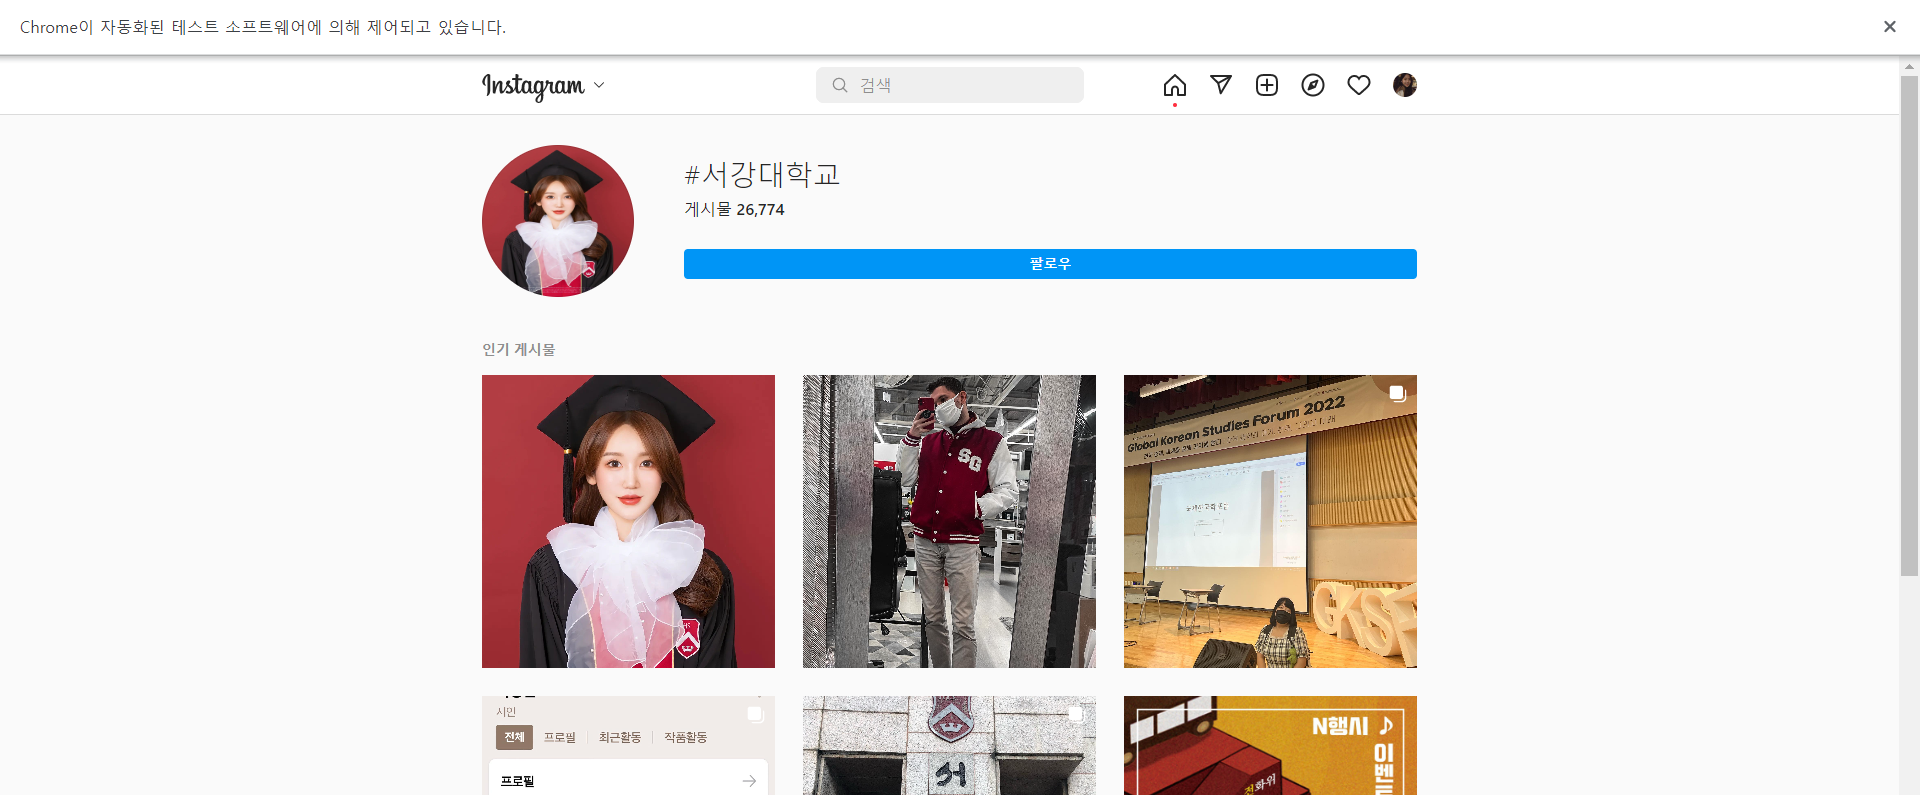

In [11]:
# 원하는 키워드 입력해서 URL 만들기
keyword = input("어떤 키워드로 검색?: ")
search = "https://www.instagram.com/explore/tags/"+keyword+"/?next=%2F"
driver.get(search)

어떤 키워드로 검색?: 샐러디


In [12]:
#첫 피드 클릭 (인기게시글 9개만 노출되기 때문)
driver.find_element(By.CLASS_NAME,"_aagw").click()

## 03. 피드의 컨텐츠 탐색하기

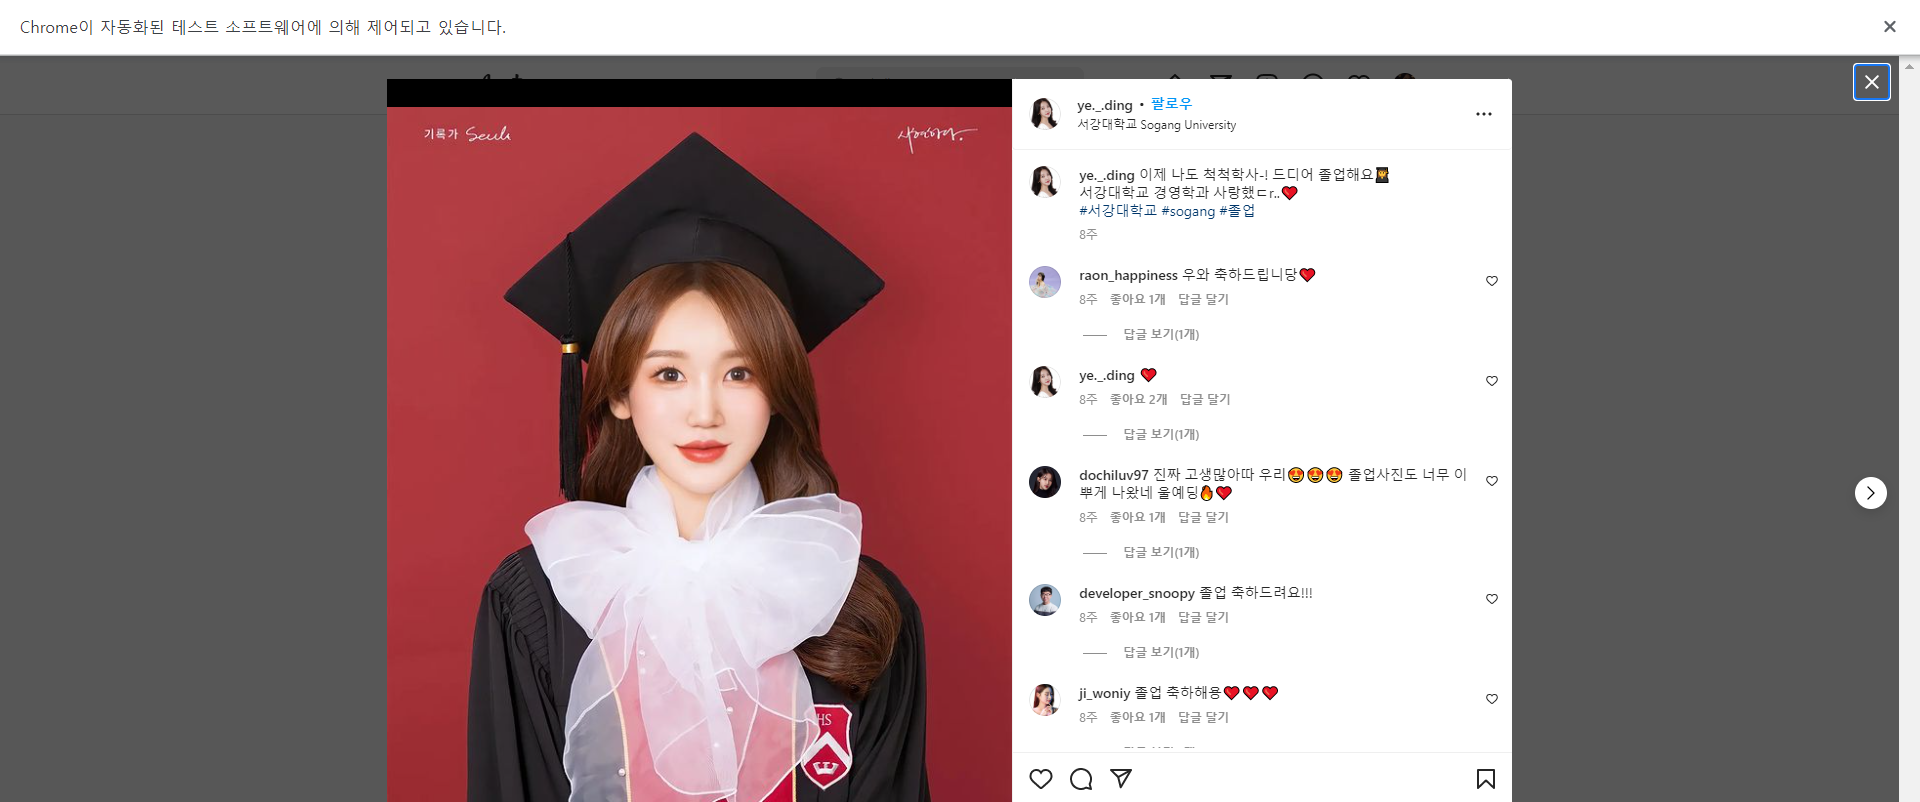

In [13]:
# 저자의 ID가져와보기
driver.find_element(By.CLASS_NAME,"_aaqt").text

'diet_2023_'

In [14]:
# 저자의 피드 작성일시 가져와보기
driver.find_element(By.CLASS_NAME,"_aaqe").text

'3시간 전'

In [15]:
# 저자의 피드 텍스트 가져와보기
driver.find_element(By.CLASS_NAME,"_a9zs").text

''

In [16]:
# 댓글의 저자 ID가져오기
# 댓글 없을 수 있음
try:
    driver.find_elements(By.CLASS_NAME,"_a9zc")[1].text
except:
    print("댓글 없음(저자 없음)")

댓글 없음(저자 없음)


In [17]:
# 댓글의 텍스트가져오기
# 댓글 없을 수 있음
try:
    driver.find_elements(By.CLASS_NAME,"_a9zs")[1].text
except:
    print("댓글 없음(텍스트 없음)")

댓글 없음(텍스트 없음)


In [19]:
# 다음페이지로 넘어가보기 : 이거 항상 바껴서 항상 업데이트 필요

driver.find_element(By.XPATH, "//*[@id=\"mount_0_0_sY\"]/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button").click()

## 04. 반복문 쌓아 크롤링해보기

In [20]:
# 시간 없으니까 10개만 시도
elems = []
for i in range(10):
    time.sleep(1)
    # 저자의 ID가져와보기
    elem_writer = driver.find_element(By.CLASS_NAME,"_aaqt").text
    # 저자의 피드 작성일시 가져와보기
    elem_time = driver.find_element(By.CLASS_NAME,"_aaqe").text
    # 저자의 피드 텍스트 가져와보기
    elem_text = driver.find_element(By.CLASS_NAME,"_a9zs").text
    
    elem = []
    elem.extend([elem_writer, elem_time, elem_text])
    elems.append(elem)
    
    
    # 다음페이지로 넘어가보기
    buttons = driver.find_elements(By.XPATH, "//*[@id=\"mount_0_0_sY\"]/div/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div/button")
    if (len(buttons) == 1):
        buttons[0].click()
    else:
        buttons[1].click()

In [21]:
# 인스타그램 크롤링 아웃풋 데이터프레임으로 만들기
insta_df = pd.DataFrame(elems)
insta_df.columns = ['저자 ID', '작성일시', '피드내용']
insta_df

,저자 ID,작성일시,피드내용
0,salady_giheung,2시간 전,
1,salady_giheung,2시간 전,
2,omuk_food,"9월 30, 2022",
3,azit_namchang_,5시간 전,
4,salady_jinju,1일 전,
5,salady_ilsansiksa,8시간 전,
6,sooong_nii,21시간 전,
7,salady_jukjeon,2시간 전,
8,salady_2000,5시간 전,
9,salady_771,43분 전,


In [22]:
# 엑셀로 다운로드~~~
# insta_df.to_excel("insta_df.xlsx", encoding='utf-8')